In [1]:
'1. Giới Thiệu'
'Sau đây là phần demo code nhằm miêu tả hiệu quả của các giải thuật tối ưu khác nhau'
'https://www.kaggle.com/gabrielstpierre/optimization-algorithms-in-keras?fbclid=IwAR0ZtLxjtalZeYZjKd8uM4gJMc_vJv3g7aaDRnJyrPiCuCpCUV43wL6Vzv0'

'https://www.kaggle.com/gabrielstpierre/optimization-algorithms-in-keras?fbclid=IwAR0ZtLxjtalZeYZjKd8uM4gJMc_vJv3g7aaDRnJyrPiCuCpCUV43wL6Vzv0'

In [2]:
'1. Import packages'

'1. Import packages'

In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.image as mping
import seaborn as sns
sns.set(style = 'white', context = 'notebook', palette = 'deep')
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, Lambda
from keras.optimizers import RMSprop, SGD, Adagrad, Adam, Adadelta  
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from matplotlib import pyplot
from math import pi
from math import cos
from math import floor
from keras.callbacks import Callback
from keras import backend
from numpy import argmax
from subprocess import check_output
from keras.layers import Convolution2D, MaxPooling2D
import keras
import tensorflow as tf


Using TensorFlow backend.


In [4]:
tf.__version__
keras.__version__


'2.3.1'

In [5]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 2545978519879544541
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6614579282
locality {
  bus_id: 1
  links {
  }
}
incarnation: 6894029910511211977
physical_device_desc: "device: 0, name: GeForce RTX 2060 SUPER, pci bus id: 0000:07:00.0, compute capability: 7.5"
]


In [6]:
gpus = tf.config.list_physical_devices('GPU')
for gpu in gpus:
    print("Name:", gpu.name, "  Type:", gpu.device_type)

Name: /physical_device:GPU:0   Type: GPU


In [7]:
'2. Load dữ liệu'

'2. Load dữ liệu'

In [8]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [9]:
'3. Khám phá dữ liêu'

'3. Khám phá dữ liêu'

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [11]:
print('Training shape: {}'.format(train.shape))


Training shape: (42000, 785)


In [12]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
print('Test shape: {}'.format(test.shape))

Test shape: (28000, 784)


In [14]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
trainX = (train.iloc[:,1:].values).astype('float32')
trainY = (train.iloc[:, 0]).values.astype('float32')
testX = test.values.astype('float32')
#del train


In [16]:
trainX

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [17]:
trainY

array([1., 0., 1., ..., 7., 6., 9.], dtype=float32)

In [18]:
Y = train['label']
Y.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

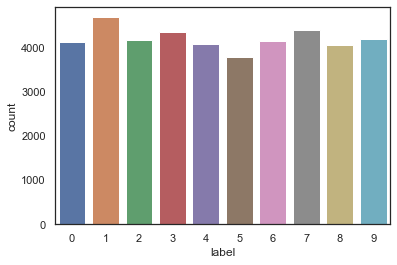

In [19]:
plot = sns.countplot(Y)



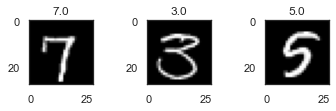

In [20]:
trainX = trainX.reshape(trainX.shape[0], 28, 28)
for i in range(6,9):
    plt.subplot(330 + (i+1))
    plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))
    plt.title(trainY[i])

In [21]:
'4. Tiền Xử lý dữ liệu'

'4. Tiền Xử lý dữ liệu'

In [22]:
trainX = trainX.reshape(-1,28,28,1)
trainX.shape

(42000, 28, 28, 1)

In [23]:
testX = testX.reshape(-1,28,28,1)
testX.shape

(28000, 28, 28, 1)

In [24]:
meanX = trainX.mean().astype(np.float32)
std_X = trainX.std().astype(np.float32)

In [25]:
def standardization(x):
    return (x-meanX)/std_X

In [26]:
trainY = to_categorical(trainY, num_classes = 10)
classes = trainY.shape[1]
classes

10

In [27]:
trainX, testX, trainY, testY = train_test_split(trainX, trainY, test_size=0.10, random_state=2)

In [28]:
trainX.shape

(37800, 28, 28, 1)

In [29]:
testX.shape


(4200, 28, 28, 1)

In [30]:
trainY.shape


(37800, 10)

In [31]:
testY.shape


(4200, 10)

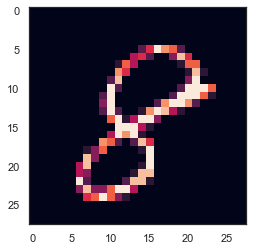

In [32]:
g = plt.imshow(trainX[0][:,:,0])


In [33]:
datagen = ImageDataGenerator(featurewise_center=False,
samplewise_center=False,
featurewise_std_normalization=False,
samplewise_std_normalization=False,
zca_whitening=False,
rotation_range=10,
zoom_range=0.1,
width_shift_range=0.1,
height_shift_range=0.1,
horizontal_flip=False,
vertical_flip=False)


In [34]:
datagen.fit(trainX)


In [35]:
type(datagen)

keras.preprocessing.image.ImageDataGenerator

In [36]:
trainX.shape

(37800, 28, 28, 1)

In [37]:
'5. Xây dựng model'

'5. Xây dựng model'

In [38]:
## Architechture

model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [39]:
## Model parameters

epochs = 25 ## We keep it low for minimum training time. Increase if better performance is needed.
batch_size = 86
verbose = 2
step_per_epoch = trainX.shape[0] // batch_size
loss = 'categorical_crossentropy'
learning_rate = 0.1

In [40]:
Momentum_opti = SGD(lr= learning_rate, momentum = 0.9, nesterov = False)


In [41]:
Nesterov_opti = SGD(lr = learning_rate, momentum = 0.9, nesterov = True)


In [42]:
RMSProp_opti = RMSprop(lr = learning_rate, rho = 0.9, decay = 0.9, epsilon = 1e-10)


In [43]:
Adam_opti = Adam(lr = learning_rate, beta_1 = 0.9, beta_2 = 0.999, epsilon = 1e-10, decay = 0.9, amsgrad = False)

In [44]:
model.compile(optimizer = Nesterov_opti, loss = loss, metrics = ["accuracy"])


In [45]:
## Training Time!

history = model.fit_generator(datagen.flow(trainX, trainY, batch_size = batch_size), epochs = epochs, validation_data = (testX, testY), verbose = verbose,
                             steps_per_epoch = step_per_epoch)

Epoch 1/25
 - 9s - loss: 7003666342947744469368309381332992.0000 - accuracy: 0.1074 - val_loss: 2.3064 - val_accuracy: 0.0960
Epoch 2/25
 - 7s - loss: 2.3036 - accuracy: 0.1040 - val_loss: 2.3026 - val_accuracy: 0.1155
Epoch 3/25
 - 6s - loss: 2.3038 - accuracy: 0.1060 - val_loss: 2.3031 - val_accuracy: 0.1155
Epoch 4/25
 - 7s - loss: 2.3036 - accuracy: 0.1068 - val_loss: 2.3053 - val_accuracy: 0.1062
Epoch 5/25
 - 7s - loss: 2.3038 - accuracy: 0.1045 - val_loss: 2.3051 - val_accuracy: 0.0995
Epoch 6/25
 - 6s - loss: 2.3037 - accuracy: 0.1069 - val_loss: 2.3026 - val_accuracy: 0.1155
Epoch 7/25
 - 7s - loss: 2.3033 - accuracy: 0.1080 - val_loss: 2.3054 - val_accuracy: 0.1062
Epoch 8/25
 - 7s - loss: 2.3039 - accuracy: 0.1067 - val_loss: 2.3016 - val_accuracy: 0.1155
Epoch 9/25
 - 6s - loss: 2.3039 - accuracy: 0.1058 - val_loss: 2.3048 - val_accuracy: 0.1062
Epoch 10/25
 - 7s - loss: 2.3037 - accuracy: 0.1065 - val_loss: 2.3012 - val_accuracy: 0.0995
Epoch 11/25
 - 7s - loss: 2.3037 - a

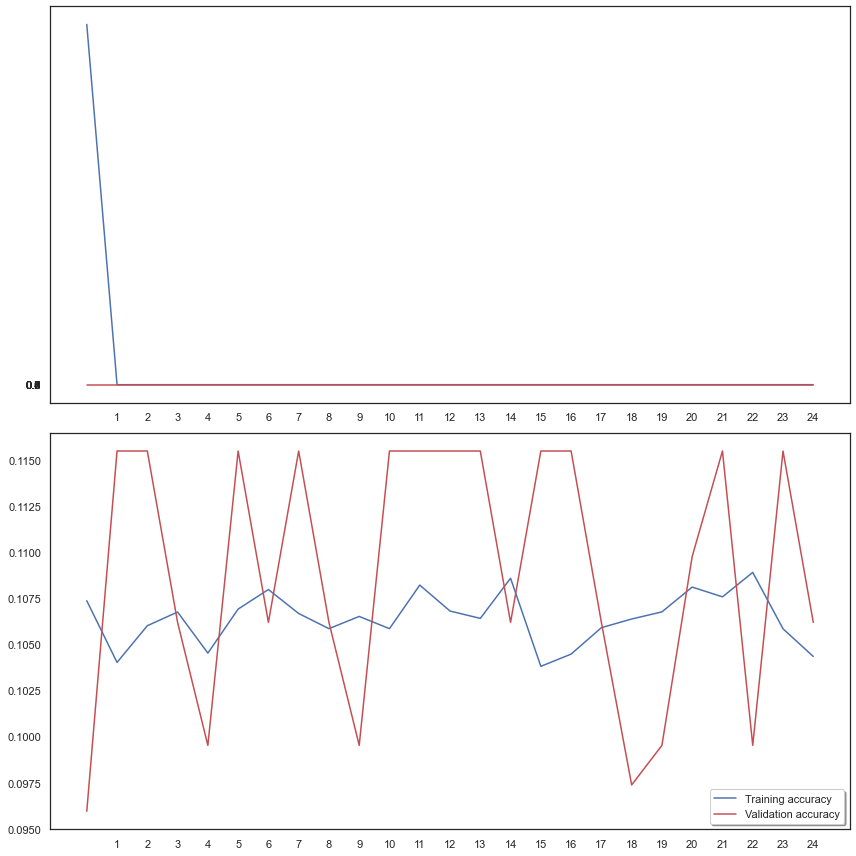

In [46]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

In [47]:
_, train_acc = model.evaluate(trainX, trainY, verbose = 0)


In [48]:
_, test_acc = model.evaluate(testX, testY, verbose = 0)


In [49]:
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))


Train: 0.105, Test: 0.106


In [50]:
predictions = model.predict_classes(testX, verbose=0)

submissions=pd.DataFrame({"ImageId": list(range(1,len(predictions)+1)),
                         "Label": predictions})

submissions.to_csv("DR.csv", index=False, header=True)